<a href="https://colab.research.google.com/github/OrangeAFK/VirtualScanner/blob/main/MetroHastingsDemo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
def target_dist(x):
    return np.exp(-x**2) * (2 + np.sin(5 * x) + np.sin(2 * x))

In [ ]:
def metropolis_hastings(target, steps=10000, proposal_std=1.0, start=0.0):
    samples = []
    x = start
    for _ in range(steps):
        # propose new point
        x_new = np.random.normal(loc=x, scale=proposal_std)

        # acceptance probability
        p_accept = min(1, target(x_new)/target(x))
        # conditionally accept
        if np.random.rand() < p_accept:
            x = x_new

        samples.append(x)

    return np.array(samples)

In [ ]:
samples = metropolis_hastings(target_dist, proposal_std=0.5)

x = np.linspace(-3, 3, 1000)
y = target_dist(x)

plt.figure(figsize=(8,4))
plt.hist(samples, bins=100, density=True, alpha=0.5, label='Samples')
plt.plot(x, y / np.trapz(y, x), label='Target (normalized)', color='red')  # normalize for overlay
plt.legend()
plt.title("MH Sampling")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# now try MH with simulated annealing

# random non-convex cost func
def cost_function(x):
    return x**2 + np.sin(5*x) + np.sin(2*x)

def mh_accept(cost_cur, cost_new, temp):
    # returns whether the change is accepted by the metropolis criterion
    f_prime = np.exp(-cost_new / temp)
    f = np.exp(-cost_cur / temp)
    alpha = min(1, f_prime / f)
    return np.random.rand() < alpha

def anneal_step(x, cost, temp, proposal_std=0.5):
    x_new = np.random.normal(loc=x, scale=proposal_std)
    cost_new = cost_function(x_new)
    if mh_accept(cost, cost_new, temp):
        return (x_new, cost_new) # accept
    else:
        return (x, cost) # reject


def MCMC(x0, temp_init=300, temp_mult=0.98, temp_min=1, max_iter=500):
    x, cost = x0, cost_function(x0)
    temp = temp_init
    path, costs = [x], [cost]

    for i in range(max_iter):
        x, cost = anneal_step(x, cost, temp)
        path.append(x)
        costs.append(cost)
        temp = max(temp_min, temp * temp_mult)
        print(temp)

        # early stop condition
        if i > 50:
            recent = costs[-50:]
            absolute_change = abs((max(recent) - min(recent)) / (np.abs(np.mean(recent)) + 1e-8))
            if absolute_change < .05:
                print(f"Terminated at iter {i} due to small absolute cost change")
                break

    return np.array(path), np.array(costs)

285.0
270.75
257.2125
244.35187499999998
232.13428124999996
220.52756718749995
209.50118882812495
199.0261293867187
189.07482291738276
179.62108177151362
170.64002768293793
162.10802629879103
154.00262498385146
146.3024937346589
138.98736904792594
132.03800059552964
125.43610056575315
119.16429553746549
113.20608076059222
107.5457767225626
102.16848788643446
97.06006349211273
92.20706031750709
87.59670730163172
83.21687193655013
79.05602833972263
75.1032269227365
71.34806557659967
67.78066229776968
64.39162918288119
61.17204772373713
58.11344533755027
55.20777307067275
52.44738441713911
49.82501519628215
47.333764436468044
44.96707621464464
42.71872240391241
40.582786283716786
38.553646969530945
36.62596462105439
34.79466639000167
33.05493307050159
31.40218641697651
29.832077096127684
28.3404732413213
26.923449579255234
25.57727710029247
24.298413245277846
23.083492583013953
21.929317953863254
20.83285205617009
19.791209453361585
18.801648980693503
17.861566531658827
16.968488205075886

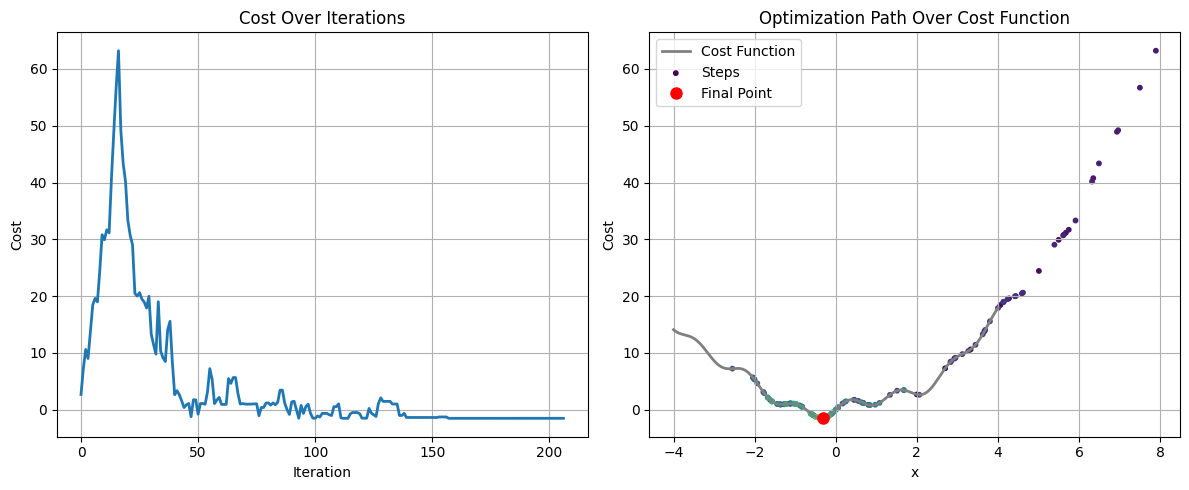

In [ ]:
x_vals = np.linspace(-4, 4, 1000)
y_vals = cost_function(x_vals)

# Run the optimization
x0 = 2.0
samples, costs = MCMC(x0, max_iter=1000, temp_mult=0.95, temp_min = .01)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(costs, color='tab:blue', lw=2)
plt.title("Cost Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x_vals, y_vals, label="Cost Function", lw=2, color='gray')
plt.scatter(samples, cost_function(samples), c=np.linspace(0, 1, len(samples)), cmap='viridis', s=10, label="Steps")
plt.plot(samples[-1], cost_function(samples[-1]), 'ro', label='Final Point', markersize=8)
plt.title("Optimization Path Over Cost Function")
plt.xlabel("x")
plt.ylabel("Cost")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()